In [1]:
from sklearn.datasets import load_diabetes
X,y = load_diabetes(True)

In [4]:
X.shape

(442, 10)

In [5]:
y.shape

(442,)

In [6]:
X[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [8]:
y[:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [9]:
from sklearn.tree import DecisionTreeRegressor
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

In [42]:
#find the 4-fold crossvalidated test_score
model = DecisionTreeRegressor(min_impurity_decrease=100)
scores = cross_val_score(model, X, y, cv = 4)
print("k-fold test R^2 = %.3f  (%.3f)" % (mean(scores), std(scores)))
model.fit(X,y)
print('training score',model.score(X,y))

k-fold test R^2 = 0.331  (0.053)
training score 0.48433922631869036


[Text(148.8, 195.696, 'X[8] <= -0.004\nmse = 5929.885\nsamples = 442\nvalue = 152.133'),
 Text(74.4, 152.208, 'X[2] <= 0.006\nmse = 3240.821\nsamples = 218\nvalue = 109.986'),
 Text(37.2, 108.72, 'mse = 2143.968\nsamples = 171\nvalue = 96.31'),
 Text(111.60000000000001, 108.72, 'mse = 4075.084\nsamples = 47\nvalue = 159.745'),
 Text(223.20000000000002, 152.208, 'X[2] <= 0.015\nmse = 5135.611\nsamples = 224\nvalue = 193.152'),
 Text(186.0, 108.72, 'mse = 4095.838\nsamples = 116\nvalue = 162.681'),
 Text(260.40000000000003, 108.72, 'X[2] <= 0.069\nmse = 4184.05\nsamples = 108\nvalue = 225.88'),
 Text(223.20000000000002, 65.232, 'X[3] <= 0.017\nmse = 3966.115\nsamples = 77\nvalue = 208.571'),
 Text(186.0, 21.744, 'mse = 5206.955\nsamples = 33\nvalue = 178.212'),
 Text(260.40000000000003, 21.744, 'mse = 1825.77\nsamples = 44\nvalue = 231.341'),
 Text(297.6, 65.232, 'mse = 2133.016\nsamples = 31\nvalue = 268.871')]

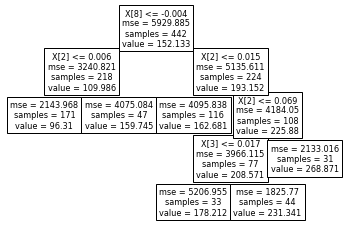

In [43]:
from sklearn import tree
tree.plot_tree(model)

In [44]:
x = [1000, 500, 300, 100, 50]
scores = []
for i in x:
    model = DecisionTreeRegressor(min_impurity_decrease=i)
    kfold_score = cross_val_score(model, X, y, cv = 4).mean()
    scores.append(kfold_score)

scores

[0.21894383383110033,
 0.28299108435059683,
 0.3345696710614511,
 0.33148413595281934,
 0.23570396680680317]

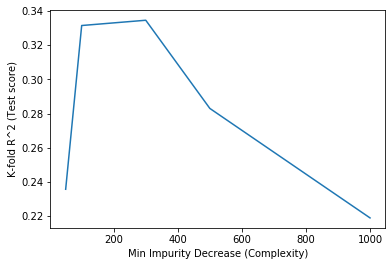

In [45]:
import matplotlib.pyplot as plt
plt.plot(x,scores)
plt.xlabel('Min Impurity Decrease (Complexity)')
plt.ylabel('K-fold R^2 (Test score)')
plt.show()

In [46]:
from sklearn.linear_model import LinearRegression
scores = cross_val_score(LinearRegression(), X, y, cv = 4)
print("k-fold test R^2 = %.3f  (%.3f)" % (mean(scores), std(scores)))

k-fold test R^2 = 0.485  (0.067)
